In [14]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit import IBMQ, Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel
from Hamming import *
import qiskit
%matplotlib inline
from random import randint

In [9]:
# Create a hamming circuit
N = 4
circuit = HammingCircuit(N, classical_registers=True)

# Create a input
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.cx(0,2)

# Add the encoder to the circuit
circuit.append(HammingEncode(N-1), list(range(2**N)))

# Add errors
circuit.x(4)
circuit.z(7)

# Add the decoder to the circuit
circuit.append(HammingDecode(N-1,read=True), list(range(2**N + 2*N - 1)))

# Measure the qubits
circuit.measure(list(range(N)),list(range(N)))

In [5]:
# Print the circuit in latex
file=open('circut_diagrams/prova.tex','w')
print(circuit.draw('latex_source'),file=file)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'circut_diagrams/prova.tex'

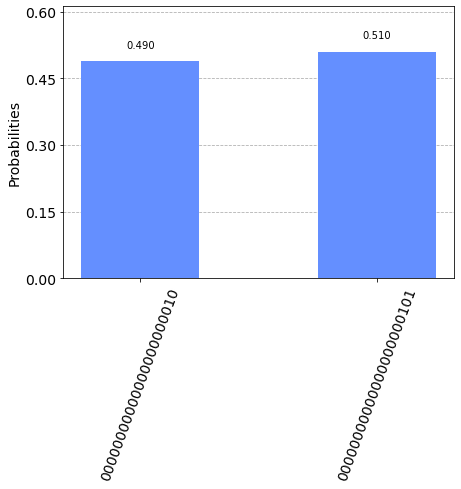

In [10]:
# Simulate the circuit
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=1000).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))